In [1]:
import os
import numpy as np 
import cv2
import matplotlib.pyplot as plt


In [11]:
trainpath = os.path.join(os.getcwd(), 'dogs-vs-cats')
trainpath = os.path.join(trainpath, 'train')
categories = ['cat', 'dog']
data = []
for category in categories:
    path = os.path.join(trainpath,category)
    label= categories.index(category)
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        Image = cv2.imread(imgpath, 0)
        try:
            Image=cv2.resize(Image,(60,60))
            Image = np.array(Image).flatten()
            data.append([Image,label])
        except Exception as exception:
            pass
print(len(data))
import  pickle as pk
pick = open('data1.pickle','wb')
pk.dump(data,pick)
pick.close()


24999


In [12]:
pick = open('data1.pickle','rb')
data=pk.load(pick)
pick.close()

In [13]:
import random
features =[]
labels = []
random.shuffle(data)
for feature ,label in data:
    features.append(feature)
    labels.append(label)

Accuracy: 0.6272
Prediction is: dog


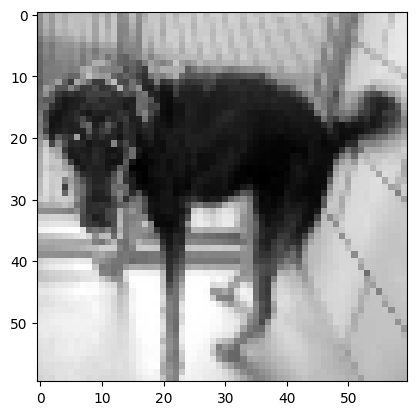

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Split the data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.05)

# Initialize the model with the correct keyword argument
model = SVC(C=1, kernel='poly', gamma='auto')

# Train the model
model.fit(x_train, y_train)

# Make predictions
prediction = model.predict(x_test)

# Calculate the accuracy
accuracy = model.score(x_test, y_test)

# Define the categories
categories = ['cat', 'dog']

# Print the accuracy and prediction
print('Accuracy:', accuracy)
print('Prediction is:', categories[prediction[0]])

# Display the image
cat_or_dog = x_test[0].reshape(60, 60)
plt.imshow(cat_or_dog, cmap='gray')
plt.show()
